Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow


In [3]:

ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

htpCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 4.995e-8,
                Permeability = 7.576e-13)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

wallKinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

# kinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

# wallKinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

radius = 2.5/100
length = 7.5
max_velocity = .0287/60
timestep = 60/3600
rings = 20
sections = 500

Model = laminarFlow.LaminarFlow(length, radius, max_velocity, serCondition, trypCondition, htpCondition, kinetics, wallKinetics, rings, sections, timestep)

Running 1 of 261
Running 2 of 261
Running 3 of 261
Running 4 of 261
Running 5 of 261
Running 6 of 261
Running 7 of 261
Running 8 of 261
Running 9 of 261
Running 10 of 261
Running 11 of 261
Running 12 of 261
Running 13 of 261
Running 14 of 261
Running 15 of 261
Running 16 of 261
Running 17 of 261
Running 18 of 261
Running 19 of 261
Running 20 of 261
Running 21 of 261
Running 22 of 261
Running 23 of 261
Running 24 of 261
Running 25 of 261
Running 26 of 261
Running 27 of 261
Running 28 of 261
Running 29 of 261
Running 30 of 261
Running 31 of 261
Running 32 of 261
Running 33 of 261
Running 34 of 261
Running 35 of 261
Running 36 of 261
Running 37 of 261
Running 38 of 261
Running 39 of 261
Running 40 of 261
Running 41 of 261
Running 42 of 261
Running 43 of 261
Running 44 of 261
Running 45 of 261
Running 46 of 261
Running 47 of 261
Running 48 of 261
Running 49 of 261
Running 50 of 261
Running 51 of 261
Running 52 of 261
Running 53 of 261
Running 54 of 261
Running 55 of 261
Running 56 of 261
R

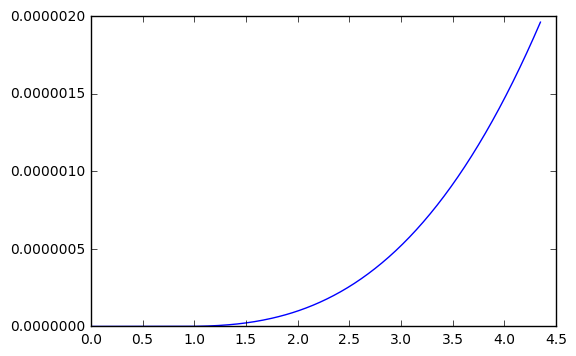

In [4]:
plt.plot( Model.time, Model.serotoninUptake)

In [5]:
print(Model.serotoninUptake)

print(Model.time)

[  0.00000000e+00   3.37367569e-12   3.37370393e-12   3.37373473e-12
   3.37376894e-12   3.37380780e-12   3.37385298e-12   3.37390672e-12
   3.37397204e-12   3.37405303e-12   3.37415520e-12   3.37428601e-12
   3.37445550e-12   3.37467723e-12   3.37496954e-12   3.37535714e-12
   3.37587342e-12   3.37656346e-12   3.37748809e-12   3.37872946e-12
   3.38039848e-12   3.38264488e-12   3.38567077e-12   3.38974907e-12
   3.39524819e-12   3.40266551e-12   3.41267252e-12   3.42617575e-12
   3.44439899e-12   3.46899434e-12   3.50219200e-12   3.54700247e-12
   3.60748928e-12   3.68913691e-12   3.79934686e-12   3.94810628e-12
   4.14888853e-12   4.41986524e-12   4.78553574e-12   5.27891431e-12
   5.94446023e-12   6.84199224e-12   8.05189857e-12   9.68203683e-12
   1.18768096e-11   1.48289926e-11   1.87949567e-11   2.41139268e-11
   3.12317794e-11   4.07295064e-11   5.33557281e-11   7.00614241e-11
   9.20333665e-11   1.20720860e-10   1.57848987e-10   2.05411635e-10
   2.65640056e-10   3.40947608e-10

In [6]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [7]:
def laminarModel(data):
    trypCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    htpCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    serCondition = ConditionSet(
                Concentration = data[9],
                Diffusivity = data[10],
                Permeability = data[11])
    
    kinetics = KineticsParamers(vmax1 = data[12],
                            Km1 = data[13],
                            K1 = data[14],
                            vmax2 = data[15],
                            Km2 = data[16],
                            K2 = data[17])
    
    wallKinetics = KineticsParamers(vmax1 = data[18],
                            Km1 = data[19],
                            K1 = data[20],
                            vmax2 = data[21],
                            Km2 = data[22],
                            K2 = data[23])

    
    iterations = 1000
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],
                                    serCondition, trypCondition, htpCondition, 
                                    kinetics, wallKinetics, 
                                    iterations)

In [8]:


morris_problem = {
    # There are six variables
    'num_vars': 23,
    # These are their names
    'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
              'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[,], # length (m)
               [,], # radius (m)
               [,], # max_velocity (m/s)
               [,], # Tryptophan Concentration
               [,], # Tryptophan Diffusivity
               [,], # Tryptophan Wall Permability
               [,], # 5HTP Concentration
               [,], # 5HTP Diffusivity
               [,], # 5HTP Wall Permability
               [,], # Serotonin Concentration (mM)
               [,], # Serotonin Diffusivity 
               [,], # Serotonin Wall Permeability 
               [,], # Max rate of Tryp -> 5HTP
               [,], # Michaelus Menton Constant Tryp -> 5HTP
               [,], # Equilibrium Constant for 5HTP and Tryp
               [,], # Max rate of 5HTP -> Serotonin
               [,], # Michaelus Menton Constant 5HTP -> Serotonin
               [,], # Equilibrium Constant for 5HTP and Serotonin
               [,], # Max wall rate of Tryp -> 5HTP
               [,], # Michaelus Menton Constant @ wall Tryp -> 5HTP
               [,], # Equilibrium Constant for 5HTP and Tryp @ wall
               [,], # Max rate of 5HTP -> Serotonin @ wall
               [,], # Michaelus Menton Constant 5HTP -> Serotonin @ wall
               [,], # Equilibrium Constant for 5HTP and Serotonin @ wall

              ],
    # I don't want to group any of these variables together
    'groups': None
    }

SyntaxError: invalid syntax (<ipython-input-8-bbb1ed4cb021>, line 10)